# How to use the R package `arulesViz` from Python using `arulespy`

This document is also available as an [IPython notebook](https://github.com/mhahsler/arulespy/blob/main/examples/arulesViz.ipynb) or you can open and run it in 
[Google Colab](https://colab.research.google.com/github/mhahsler/arulespy/blob/main/examples/arulesViz.ipynb).

In [28]:
## Windows users: These environment variables may be necessary till rpy2 does this automatically
#from rpy2 import situation
#import os
#
#r_home = situation.r_home_from_registry()
#r_bin = r_home + '\\bin\\x64\\'
#os.environ['R_HOME'] = r_home
#os.environ['PATH'] =  r_bin + ";" + os.environ['PATH']
#os.add_dll_directory(r_bin)

In [30]:
import rpy2.rinterface as rinterface
import rpy2.robjects as ro

StrSexpVector = rinterface.StrSexpVector
_installed_packages = rinterface.baseenv['::'](StrSexpVector(('utils', )),
                                 StrSexpVector(('installed.packages', )))

lib_loc=None

r = ro.vectors.StrVector(_installed_packages(**{'lib.loc': lib_loc}))
[x for x in r.rx(True,1)]

#[x for x in packages]
#self.packages = packages.iloc[:0]

['abind',
 'animation',
 'arules',
 'arulesCBA',
 'arulesViz',
 'askpass',
 'assertthat',
 'backports',
 'base64enc',
 'bayesm',
 'BH',
 'bigD',
 'BiocGenerics',
 'BiocManager',
 'BiocVersion',
 'Biostrings',
 'bit',
 'bit64',
 'bitops',
 'blob',
 'bookdown',
 'brew',
 'brio',
 'broom',
 'bslib',
 'C50',
 'ca',
 'cachem',
 'callr',
 'candisc',
 'car',
 'carData',
 'caret',
 'caTools',
 'cba',
 'cellranger',
 'chatgpt',
 'checkmate',
 'classInt',
 'cli',
 'clipr',
 'clisymbols',
 'clock',
 'clue',
 'clusterGeneration',
 'coin',
 'collections',
 'colorspace',
 'colourpicker',
 'combinat',
 'commonmark',
 'compositions',
 'config',
 'conflicted',
 'coRanking',
 'corrgram',
 'corrplot',
 'corrr',
 'cowplot',
 'cpp11',
 'crancache',
 'cranlike',
 'cranlogs',
 'crayon',
 'credentials',
 'crosstalk',
 'Cubist',
 'curl',
 'CVST',
 'cyclocomp',
 'data.table',
 'DBI',
 'dbplyr',
 'dbscan',
 'debugme',
 'dendextend',
 'DendSer',
 'DEoptimR',
 'Deriv',
 'desc',
 'devtools',
 'diagram',
 'diffobj',

## Import Data and Mine Rules

Import the `arules` module from package `arulespy`.

In [3]:
from arulespy.arules import Transactions, apriori, parameters
from arulespy.arulesViz import plot, inspectDT

We read [Zoo.cvs](Zoo.cvs) which contains the description of 101 animals containing nominal variables and one quantitative variable as a pandas dataframe.

In [30]:
import pandas as pd

df = pd.read_csv('Zoo.csv')
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,True,False,False,True,False,False,False,True,True,True,False,False,2,True,False,True,mammal
97,True,False,True,False,True,False,False,False,False,True,True,False,6,False,False,False,insect
98,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
99,False,False,True,False,False,False,False,False,False,True,False,False,0,False,False,False,mollusc.et.al


Convert the pandas dataframe into a sparse transactions object.

In [31]:
trans = Transactions.from_df(df)

trans.as_df()


,items,transactionID
1,"{hair,milk,predator,toothed,backbone,breathes,...",0
2,"{hair,milk,toothed,backbone,breathes,legs=[4,8...",1
3,"{eggs,aquatic,predator,toothed,backbone,fins,l...",2
4,"{hair,milk,predator,toothed,backbone,breathes,...",3
5,"{hair,milk,predator,toothed,backbone,breathes,...",4
...,...,...
97,"{hair,milk,toothed,backbone,breathes,legs=[2,4...",96
98,"{hair,eggs,airborne,breathes,venomous,legs=[4,...",97
99,"{hair,milk,predator,toothed,backbone,breathes,...",98
100,"{eggs,breathes,legs=[0,2),type=mollusc.et.al}",99


In [32]:
rules = apriori(trans,
                    parameter = parameters({"supp": 0.1, "conf": 0.8}), 
                    control = parameters({"verbose": False}))  

rules.as_df().round(2)

,LHS,RHS,support,confidence,coverage,lift,count
1,{},{backbone},0.82,0.82,1.00,1.00,83
2,{type=fish},{fins},0.13,1.00,0.13,5.94,13
3,{type=fish},"{legs=[0,2)}",0.13,1.00,0.13,4.39,13
4,{type=fish},{aquatic},0.13,1.00,0.13,2.81,13
5,{type=fish},{eggs},0.13,1.00,0.13,1.71,13
...,...,...,...,...,...,...,...
5896,"{hair,milk,predator,toothed,backbone,breathes,...",{catsize},0.12,0.86,0.14,1.97,12
5897,"{hair,milk,predator,toothed,backbone,breathes,...","{legs=[4,8]}",0.12,0.92,0.13,1.83,12
5898,"{milk,predator,toothed,backbone,breathes,legs=...",{hair},0.12,1.00,0.12,2.35,12
5899,"{hair,milk,predator,toothed,backbone,breathes,...",{type=mammal},0.12,1.00,0.12,2.46,12


## arulesViz with ggplot

`arulesViz` provides `ggplot` as an drawing engine. `arulesViz.plot()` returns the `ggplot` object which can be
included in the notebook using `image_png()`. 

In [33]:
import rpy2.robjects.lib.ggplot2 as gp
from rpy2.ipython.ggplot import image_png

R[write to console]: To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/local/lib/R/site-library’ contains no packages

R[write to console]: 2: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/local/lib/R/site-library’ contains no packages

R[write to console]: 3: Column(s) 13, 17 not logical or factor. Applying default discretization (see '? discretizeDF'). 



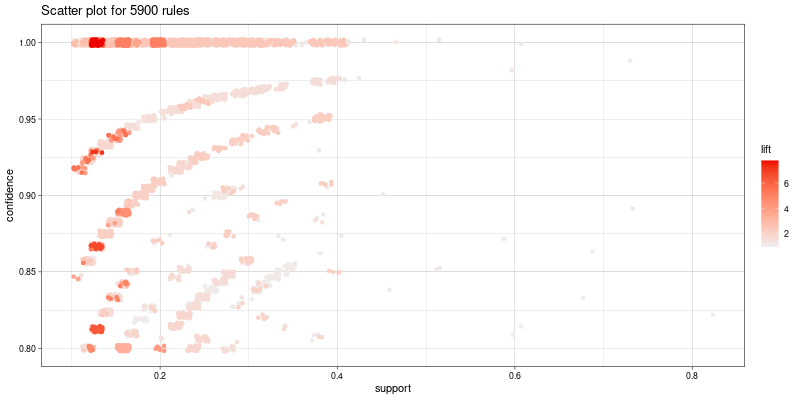

In [34]:

gg = plot(rules, method="scatter")
image_png(gg)

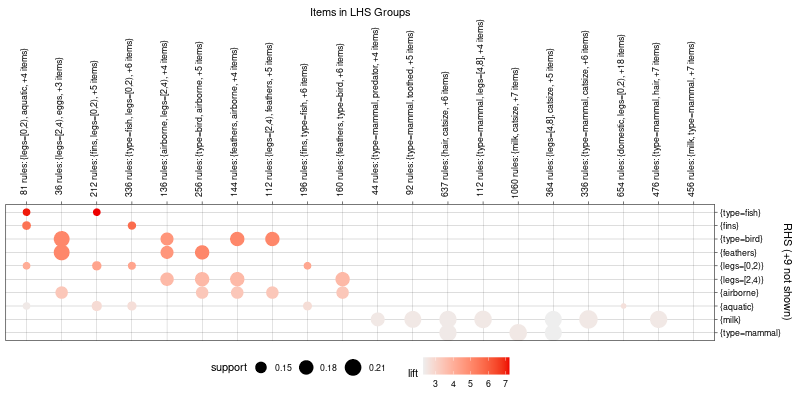

In [35]:
gg = plot(rules, method="grouped")
image_png(gg)

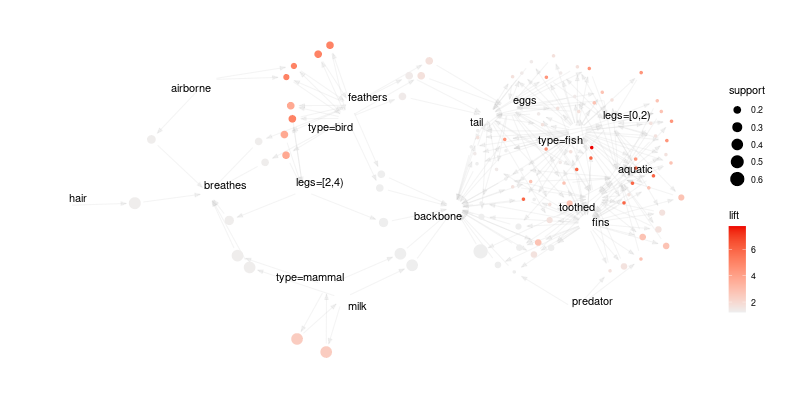

In [36]:
rules_20 = rules.sort(by = 'confidence')[0:100]
gg = plot(rules_20, method="graph")
image_png(gg)

## Interactive Rules Table with HTML Widget

`arulesViz` can create interactive HTML widgets which can easily be integrated into a 
python notebook by saving the widget as a HTML fiel and including it using a IFrame.

In [37]:
from IPython.display import IFrame

import rpy2.robjects.packages as packages
htmlwidgets = packages.importr('htmlwidgets')

In [38]:
m = inspectDT(rules)
htmlwidgets.saveWidget(m, 'datatable.html')

IFrame("datatable.html", "100%", 600)

## arulesViz with HTML Widgets

In [39]:
from IPython.display import IFrame
import rpy2.robjects.packages as packages
htmlwidgets = packages.importr('htmlwidgets')

m = plot(rules_20, method="graph", engine="htmlwidget")
htmlwidgets.saveWidget(m, "graph.html", selfcontained = True)
IFrame("graph.html", "100%", 800)


## Interactive RuleExplorer

RuleExplorer only has experimental support at this point. The ruleExplorer opens a Shiny up in the web browser. Shutting down the Shiny app from within a Python notebook seems to be difficult. Uncomment the following line to explore the rules.

In [40]:
from arulespy.arulesViz import ruleExplorer

# ruleExplorer(rules)

An example of a running ruleExplorer can be found [here](https://mhahsler-apps.shinyapps.io/ruleExplorer_demo/).